#### variaveis
usuario (el nombre en Twitter)
    «op» = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
    «co» =Conscientiousness – grado de orden, prolijidad, organización
    «ex» = Extraversion – grado de timidez, solitario o participación ante el grupo social
    «ag» = Agreeableness – grado de empatía con los demás, temperamento
    «ne» = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
    Wordcount – Cantidad promedio de palabras usadas en sus tweets
    Categoria – Actividad laboral del usuario (actor, cantante, etc.)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(10,6)
plt.style.use('ggplot')

In [2]:
dataframe=pd.read_csv('F:\Ingeniería Industrial e Engenharia de  Produção\Cursos de Informática y análisis de sistemas etc/UDACITY\Paso a paso ejemplo de machine learning\machine-learning-master/analisis.csv')

In [3]:
print(dataframe.head())

           usuario         op         co         ex         ag         ne  \
0     3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1  aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2   albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3    AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4   alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   

   wordcount  categoria  
0    37.0945          7  
1    78.7970          7  
2    49.2604          4  
3    80.4538          2  
4    47.0645          4  


In [4]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [5]:
dataframe.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

###Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

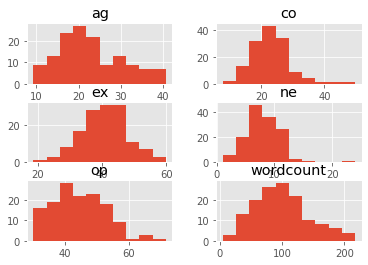

In [6]:
dataframe.drop('categoria',1).hist()
plt.show()

####En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

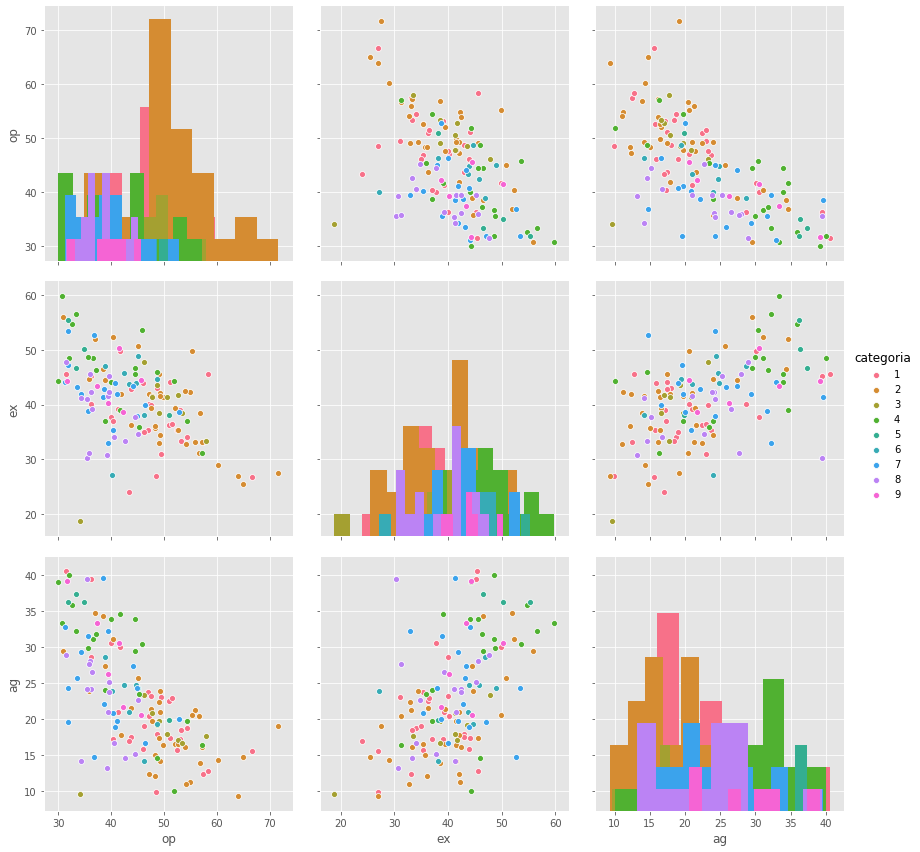

In [7]:
sb.pairplot(dataframe.dropna(),hue='categoria',height=4, diag_kind='hist',vars=['op','ex','ag'], kind='scatter')
plt.savefig('F:\Ingeniería Industrial e Engenharia de  Produção\Cursos de Informática y análisis de sistemas etc/UDACITY\Paso a paso ejemplo de machine learning\machine-learning-master/'
            'pairplot_KMeans.png')

In [8]:
X=np.array(dataframe[['op','ex','ag']])
y=np.array(dataframe['categoria'])
X.shape

(140, 3)

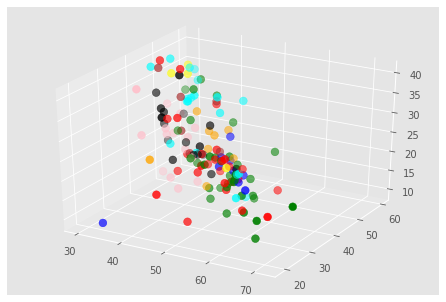

In [9]:
fig=plt.figure()
ax=Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)

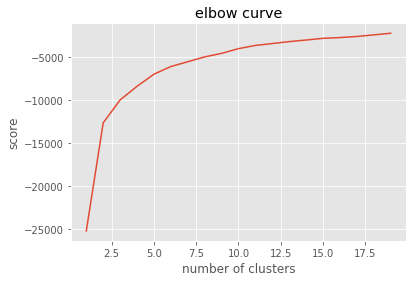

In [10]:
Nc=range(1,20)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('number of clusters')
plt.ylabel('score')
plt.title('elbow curve')
plt.show()

In [11]:
kmeans=KMeans(n_clusters=5).fit(X)
centroids=kmeans.cluster_centers_
centroids

array([[42.34308436, 34.48699532, 20.09044256],
       [33.0538162 , 49.62858753, 36.43684127],
       [57.92200861, 31.5039735 , 15.67199517],
       [38.7202331 , 44.71100262, 28.1871609 ],
       [49.33935462, 41.54534733, 17.86185429]])

In [12]:
labels = kmeans.predict(X)
labels

array([3, 0, 3, 3, 3, 3, 3, 1, 4, 3, 4, 0, 2, 4, 0, 4, 3, 4, 4, 1, 1, 4,
       0, 1, 4, 0, 3, 3, 3, 4, 0, 4, 4, 4, 1, 1, 3, 1, 3, 0, 3, 3, 3, 3,
       2, 2, 4, 4, 1, 3, 4, 3, 3, 2, 3, 2, 0, 4, 0, 2, 0, 0, 4, 2, 3, 3,
       2, 2, 2, 3, 3, 0, 0, 4, 0, 2, 3, 3, 1, 1, 1, 4, 2, 4, 0, 3, 4, 4,
       4, 4, 4, 0, 0, 4, 4, 3, 1, 4, 3, 4, 2, 4, 4, 1, 2, 4, 3, 3, 0, 4,
       4, 3, 3, 3, 3, 4, 0, 2, 3, 3, 0, 3, 4, 0, 2, 0, 0, 4, 4, 0, 4, 4,
       0, 4, 2, 3, 1, 2, 4, 1])

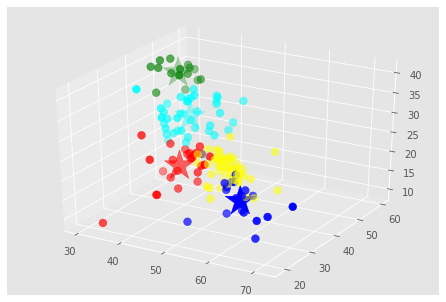

In [13]:
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

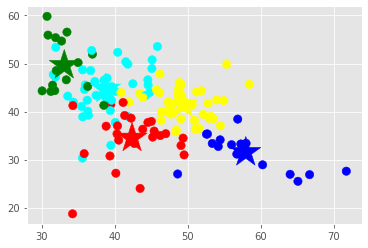

In [14]:
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

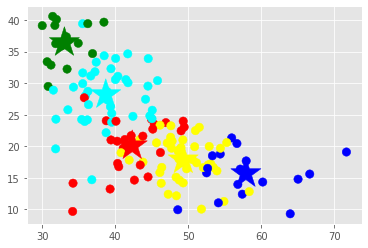

In [15]:
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

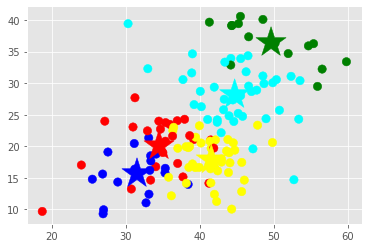

In [16]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [17]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,25
1,green,15
2,blue,18
3,cyan,40
4,yellow,42


In [18]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[4]


#####Conclusiones

El algoritmo de K-means nos ayudará a crear clusters cuando tengamos grandes grupos de datos sin etiquetar, cuando queramos intentar descubrir nuevas relaciones entre features o para probar o declinar hipótesis que tengamos de nuestro negocio.

Atención: Puede haber casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser. Si bien K-means siempre nos brindará «k clusters», quedará en nuestro criterio reconocer la utilidad de los mismos o bien revisar nuestras features y descartar las que no sirven o conseguir nuevas. También tener en cuenta que en este ejemplo estamos utilizando como medida de similitud entre features la distancia Euclideana pero podemos utilizar otras diversas funciones que podrían arrojar mejores resultados (como Manhattan, Lavenshtein, Mahalanobis, etc).